In [ ]:
import os
import glob

import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [ ]:
from segment_anything import build_sam_vit_b

In [45]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=100):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2)) 

In [ ]:
sam = build_sam_vit_b(checkpoint="ckpts/sam_vit_b_01ec64.pth")
sam = sam.to("cuda")

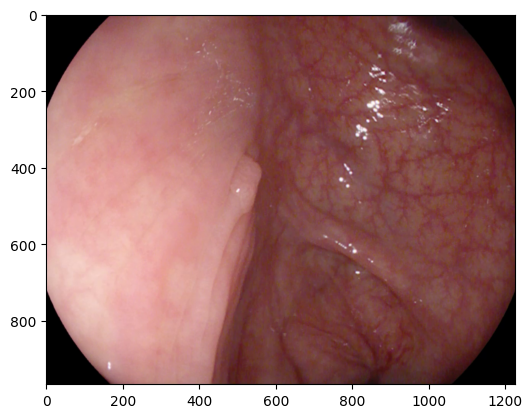

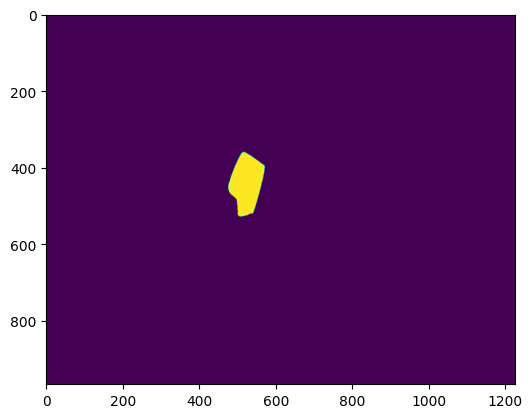

In [40]:
image_path = "/mnt/sdd/nguyen.van.quan/Researchs/Polyp/Dataset/TestDataset/ETIS-LaribPolypDB/images/1.png"
image = Image.open(image_path)
image = np.asarray(image)
plt.figure(0)
plt.imshow(image)
mask_path = "/mnt/sdd/nguyen.van.quan/Researchs/Polyp/Dataset/TestDataset/ETIS-LaribPolypDB/masks/1.png"
mask = Image.open(mask_path)
mask = np.asarray(mask)
plt.figure(1)
plt.imshow(mask)

# Auto Mask

In [ ]:
from segment_anything.automatic_mask_generator import SamAutomaticMaskGenerator

In [ ]:
autoSAM = SamAutomaticMaskGenerator(
    model=sam,
)

In [ ]:
anns = autoSAM.generate(image)

In [ ]:
print(len(anns))

In [ ]:
for i in range(len(anns)):
    plt.figure(i)
    plt.imshow(anns[i]["segmentation"])

# Points prompt

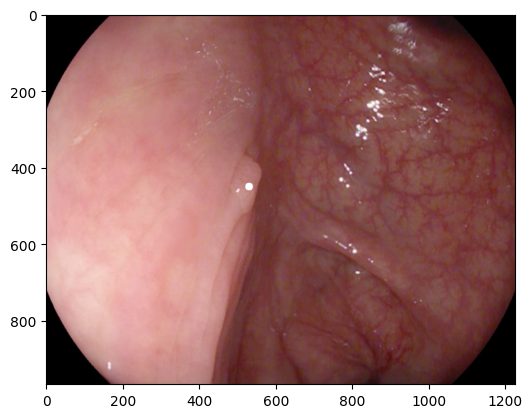

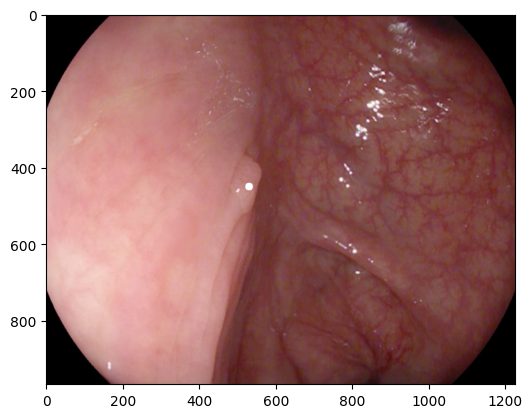

In [39]:
point_coords = np.asarray([530, 450])
temp = cv2.circle(image, point_coords, radius=10, color=(255, 255, 255), thickness=-1)
plt.figure(0)
plt.imshow(temp)
plt.figure(1)
plt.imshow(image)

In [30]:
from segment_anything import SamPredictor

In [31]:
predictor = SamPredictor(sam_model=sam)

In [41]:
predictor.set_image(image)

In [35]:
input_points = np.asarray([[530, 450]])
input_labels = np.asarray([1])

In [42]:
masks, scores, logits = predictor.predict(
    point_coords=input_points,
    point_labels=input_labels,
    multimask_output=True
)

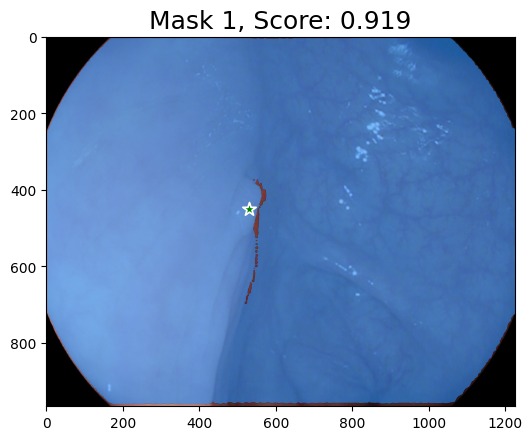

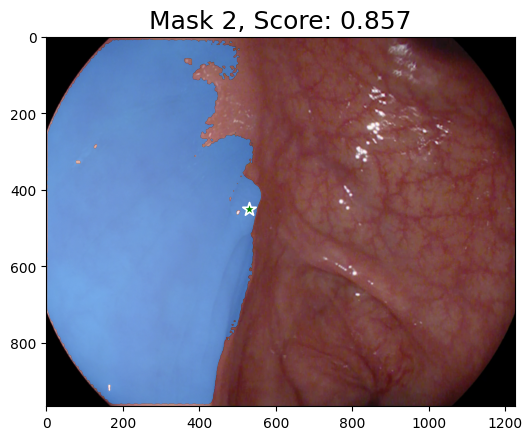

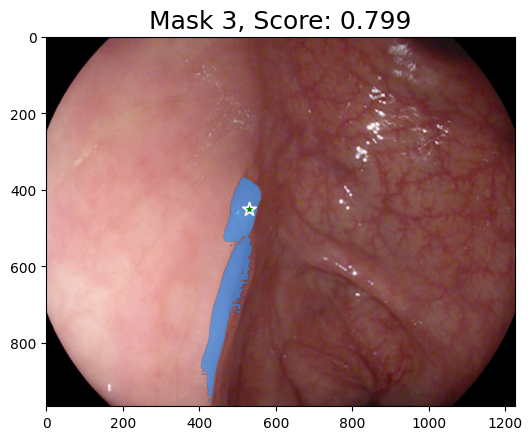

In [47]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(i)
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_points, input_labels, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)